### ML : KNN model
- 새로운 음악 포함 : country 1곡, hiphop 1곡, fusion 음악 2곡
- kaggle 3sec csv 파일 사용

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# 데이터 불러오기
# 3s csv data 사용
df = pd.read_csv("./data/features_3_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [16]:
df = df.drop(columns=['length', 'filename', 'chroma_stft_var', 'rms_var', 'spectral_centroid_var', 'spectral_bandwidth_var', 'rolloff_var', 'zero_crossing_rate_var', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_var', 'mfcc2_var', 'mfcc3_var', 'mfcc4_var', 'mfcc5_var', 'mfcc6_var', 'mfcc6_var', 'mfcc7_var', 'mfcc8_var', 'mfcc9_var', 'mfcc10_var', 'mfcc11_var', 'mfcc12_var', 'mfcc13_var', 'mfcc14_var', 'mfcc15_var', 'mfcc16_var', 'mfcc17_var', 'mfcc18_var', 'mfcc19_var', 'mfcc20_var', 'harmony_mean'])
df

,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,...,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean,label
0,0.335406,0.130405,1773.065032,1972.744388,3714.560359,0.081851,-118.627914,125.083626,-23.443724,41.321484,...,10.183875,-4.681614,8.417439,-7.233477,-2.853603,-3.241280,0.722209,-5.050335,-0.243027,blues
1,0.343065,0.112699,1816.693777,2010.051501,3869.682242,0.087173,-125.590706,122.421227,-20.718019,50.128387,...,8.145000,-7.717751,8.397150,-8.300493,4.074709,-6.055294,0.159015,-2.837699,5.784063,blues
2,0.346815,0.132003,1788.539719,2084.565132,3997.639160,0.071383,-132.441940,115.085175,-14.811666,50.189293,...,11.853963,-4.677677,6.571110,-2.424750,4.806280,-1.768610,2.378768,-1.938424,2.517375,blues
3,0.363639,0.132565,1655.289045,1960.039988,3568.300218,0.069426,-118.231087,132.116501,-18.758335,39.769306,...,10.389314,-4.362739,9.156193,-9.889441,-1.359111,-3.841155,1.218588,-3.580352,3.630866,blues
4,0.335579,0.143289,1630.656199,1948.503884,3469.992864,0.070095,-105.968376,134.643646,-19.961748,40.171753,...,17.045437,-5.681399,5.705521,-7.986080,2.092937,0.664582,1.689446,-3.392489,0.536961,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,0.349126,0.050019,1499.083005,1718.707215,3015.559458,0.072885,-224.972168,141.034027,-31.418577,44.239845,...,9.496511,-16.715929,8.380793,-2.225949,5.773784,-9.094270,-4.246976,-5.625813,1.818823,rock
9986,0.372564,0.057897,1847.965128,1906.468492,3746.694524,0.089111,-192.806641,118.249252,-36.626003,47.933037,...,11.510695,-19.505360,2.598546,-8.003813,2.074155,-12.375726,-3.081278,-11.960546,0.428857,rock
9987,0.347481,0.052403,1346.157659,1561.859087,2442.362154,0.072194,-287.840088,131.430176,-11.647097,55.451031,...,6.899863,-13.186050,-3.914767,-9.124884,-1.005473,-2.524483,4.809936,1.775686,-0.299545,rock
9988,0.387527,0.066430,2084.515327,2018.366254,4313.266226,0.104072,-162.659592,105.525452,-36.225224,63.086830,...,12.855068,-14.699870,4.112486,-5.266814,4.123402,-5.363541,6.462601,2.354765,0.675824,rock


In [17]:
df.rename(columns= {'chroma_stft_mean':'chroma_stft', 'rms_mean':'rmse', 'spectral_centroid_mean':'spec_cent', 'spectral_bandwidth_mean':'spec_bw', 'rolloff_mean':'rolloff', 'zero_crossing_rate_mean':'zcr', 'mfcc1_mean':'mfcc1', 'mfcc2_mean':'mfcc2', 'mfcc3_mean':'mfcc3', 'mfcc4_mean':'mfcc4', 'mfcc5_mean':'mfcc5', 'mfcc6_mean':'mfcc6', 'mfcc7_mean':'mfcc7', 'mfcc8_mean':'mfcc8', 'mfcc9_mean':'mfcc9', 'mfcc10_mean':'mfcc10', 'mfcc11_mean':'mfcc11', 'mfcc12_mean':'mfcc12', 'mfcc13_mean':'mfcc13', 'mfcc14_mean':'mfcc14', 'mfcc15_mean':'mfcc15', 'mfcc16_mean':'mfcc16', 'mfcc17_mean':'mfcc17', 'mfcc18_mean':'mfcc18', 'mfcc19_mean':'mfcc19', 'mfcc20_mean':'mfcc20'}, inplace=True)
df

,chroma_stft,rmse,spec_cent,spec_bw,rolloff,zcr,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.335406,0.130405,1773.065032,1972.744388,3714.560359,0.081851,-118.627914,125.083626,-23.443724,41.321484,...,10.183875,-4.681614,8.417439,-7.233477,-2.853603,-3.241280,0.722209,-5.050335,-0.243027,blues
1,0.343065,0.112699,1816.693777,2010.051501,3869.682242,0.087173,-125.590706,122.421227,-20.718019,50.128387,...,8.145000,-7.717751,8.397150,-8.300493,4.074709,-6.055294,0.159015,-2.837699,5.784063,blues
2,0.346815,0.132003,1788.539719,2084.565132,3997.639160,0.071383,-132.441940,115.085175,-14.811666,50.189293,...,11.853963,-4.677677,6.571110,-2.424750,4.806280,-1.768610,2.378768,-1.938424,2.517375,blues
3,0.363639,0.132565,1655.289045,1960.039988,3568.300218,0.069426,-118.231087,132.116501,-18.758335,39.769306,...,10.389314,-4.362739,9.156193,-9.889441,-1.359111,-3.841155,1.218588,-3.580352,3.630866,blues
4,0.335579,0.143289,1630.656199,1948.503884,3469.992864,0.070095,-105.968376,134.643646,-19.961748,40.171753,...,17.045437,-5.681399,5.705521,-7.986080,2.092937,0.664582,1.689446,-3.392489,0.536961,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,0.349126,0.050019,1499.083005,1718.707215,3015.559458,0.072885,-224.972168,141.034027,-31.418577,44.239845,...,9.496511,-16.715929,8.380793,-2.225949,5.773784,-9.094270,-4.246976,-5.625813,1.818823,rock
9986,0.372564,0.057897,1847.965128,1906.468492,3746.694524,0.089111,-192.806641,118.249252,-36.626003,47.933037,...,11.510695,-19.505360,2.598546,-8.003813,2.074155,-12.375726,-3.081278,-11.960546,0.428857,rock
9987,0.347481,0.052403,1346.157659,1561.859087,2442.362154,0.072194,-287.840088,131.430176,-11.647097,55.451031,...,6.899863,-13.186050,-3.914767,-9.124884,-1.005473,-2.524483,4.809936,1.775686,-0.299545,rock
9988,0.387527,0.066430,2084.515327,2018.366254,4313.266226,0.104072,-162.659592,105.525452,-36.225224,63.086830,...,12.855068,-14.699870,4.112486,-5.266814,4.123402,-5.363541,6.462601,2.354765,0.675824,rock


In [18]:
# 새로운 파일 (4개) 불러오기
df2 = pd.read_csv("./data/only_new_n_file.csv")
df2

,path,filename,chroma_stft,rmse,spec_cent,spec_bw,rolloff,zcr,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,./data/genres(new_n)/new/country.wav,country.wav,0.405833,0.150884,1801.780279,2061.809925,3808.076928,0.082311,-138.416380,107.74444,...,4.911643,-1.861773,3.432274,-3.833768,3.443918,-3.195200,4.867384,-2.693485,-1.800244,country
1,./data/genres(new_n)/new/fusion.01.wav,fusion.01.wav,0.403036,0.201435,2612.195398,2712.788073,5855.150097,0.108375,-59.468258,77.29785,...,6.837155,-8.763196,0.700869,-7.219707,3.109256,-12.741076,0.762420,-12.925092,0.018498,fusion
2,./data/genres(new_n)/new/fusion.00.wav,fusion.00.wav,0.243923,0.157501,1261.581792,1530.421159,2268.777103,0.063182,-162.999820,137.44814,...,-3.346426,-9.124072,-5.896582,-4.805422,-4.856084,-5.165923,-1.054640,-3.473535,3.911199,fusion
3,./data/genres(new_n)/new/hiphop.wav,hiphop.wav,0.333927,0.193895,1922.524472,1913.085393,3828.246460,0.085060,-126.523470,104.13967,...,-5.408213,-4.625746,6.598872,-2.563093,6.465259,-0.746290,3.566419,-3.256784,-1.105662,hiphop


In [19]:
df2.drop(columns=['path', 'filename'], inplace=True)
df2

,chroma_stft,rmse,spec_cent,spec_bw,rolloff,zcr,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.405833,0.150884,1801.780279,2061.809925,3808.076928,0.082311,-138.416380,107.74444,-8.081799,35.410576,...,4.911643,-1.861773,3.432274,-3.833768,3.443918,-3.195200,4.867384,-2.693485,-1.800244,country
1,0.403036,0.201435,2612.195398,2712.788073,5855.150097,0.108375,-59.468258,77.29785,7.072240,31.523220,...,6.837155,-8.763196,0.700869,-7.219707,3.109256,-12.741076,0.762420,-12.925092,0.018498,fusion
2,0.243923,0.157501,1261.581792,1530.421159,2268.777103,0.063182,-162.999820,137.44814,-11.774125,13.389125,...,-3.346426,-9.124072,-5.896582,-4.805422,-4.856084,-5.165923,-1.054640,-3.473535,3.911199,fusion
3,0.333927,0.193895,1922.524472,1913.085393,3828.246460,0.085060,-126.523470,104.13967,-25.170930,7.303225,...,-5.408213,-4.625746,6.598872,-2.563093,6.465259,-0.746290,3.566419,-3.256784,-1.105662,hiphop


In [20]:
df3 = pd.concat([df,df2])
df3

,chroma_stft,rmse,spec_cent,spec_bw,rolloff,zcr,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.335406,0.130405,1773.065032,1972.744388,3714.560359,0.081851,-118.627914,125.083626,-23.443724,41.321484,...,10.183875,-4.681614,8.417439,-7.233477,-2.853603,-3.241280,0.722209,-5.050335,-0.243027,blues
1,0.343065,0.112699,1816.693777,2010.051501,3869.682242,0.087173,-125.590706,122.421227,-20.718019,50.128387,...,8.145000,-7.717751,8.397150,-8.300493,4.074709,-6.055294,0.159015,-2.837699,5.784063,blues
2,0.346815,0.132003,1788.539719,2084.565132,3997.639160,0.071383,-132.441940,115.085175,-14.811666,50.189293,...,11.853963,-4.677677,6.571110,-2.424750,4.806280,-1.768610,2.378768,-1.938424,2.517375,blues
3,0.363639,0.132565,1655.289045,1960.039988,3568.300218,0.069426,-118.231087,132.116501,-18.758335,39.769306,...,10.389314,-4.362739,9.156193,-9.889441,-1.359111,-3.841155,1.218588,-3.580352,3.630866,blues
4,0.335579,0.143289,1630.656199,1948.503884,3469.992864,0.070095,-105.968376,134.643646,-19.961748,40.171753,...,17.045437,-5.681399,5.705521,-7.986080,2.092937,0.664582,1.689446,-3.392489,0.536961,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,0.369293,0.050524,1634.330126,1867.422378,3462.042142,0.068495,-236.018494,125.729851,-17.066608,62.751545,...,18.518749,-13.869130,9.048212,-7.005269,1.342274,-11.598399,-0.178517,-6.903252,-3.412534,rock
0,0.405833,0.150884,1801.780279,2061.809925,3808.076928,0.082311,-138.416380,107.744440,-8.081799,35.410576,...,4.911643,-1.861773,3.432274,-3.833768,3.443918,-3.195200,4.867384,-2.693485,-1.800244,country
1,0.403036,0.201435,2612.195398,2712.788073,5855.150097,0.108375,-59.468258,77.297850,7.072240,31.523220,...,6.837155,-8.763196,0.700869,-7.219707,3.109256,-12.741076,0.762420,-12.925092,0.018498,fusion
2,0.243923,0.157501,1261.581792,1530.421159,2268.777103,0.063182,-162.999820,137.448140,-11.774125,13.389125,...,-3.346426,-9.124072,-5.896582,-4.805422,-4.856084,-5.165923,-1.054640,-3.473535,3.911199,fusion


In [21]:
df3.reset_index(inplace=True)
df3

,index,chroma_stft,rmse,spec_cent,spec_bw,rolloff,zcr,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0,0.335406,0.130405,1773.065032,1972.744388,3714.560359,0.081851,-118.627914,125.083626,-23.443724,...,10.183875,-4.681614,8.417439,-7.233477,-2.853603,-3.241280,0.722209,-5.050335,-0.243027,blues
1,1,0.343065,0.112699,1816.693777,2010.051501,3869.682242,0.087173,-125.590706,122.421227,-20.718019,...,8.145000,-7.717751,8.397150,-8.300493,4.074709,-6.055294,0.159015,-2.837699,5.784063,blues
2,2,0.346815,0.132003,1788.539719,2084.565132,3997.639160,0.071383,-132.441940,115.085175,-14.811666,...,11.853963,-4.677677,6.571110,-2.424750,4.806280,-1.768610,2.378768,-1.938424,2.517375,blues
3,3,0.363639,0.132565,1655.289045,1960.039988,3568.300218,0.069426,-118.231087,132.116501,-18.758335,...,10.389314,-4.362739,9.156193,-9.889441,-1.359111,-3.841155,1.218588,-3.580352,3.630866,blues
4,4,0.335579,0.143289,1630.656199,1948.503884,3469.992864,0.070095,-105.968376,134.643646,-19.961748,...,17.045437,-5.681399,5.705521,-7.986080,2.092937,0.664582,1.689446,-3.392489,0.536961,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9989,0.369293,0.050524,1634.330126,1867.422378,3462.042142,0.068495,-236.018494,125.729851,-17.066608,...,18.518749,-13.869130,9.048212,-7.005269,1.342274,-11.598399,-0.178517,-6.903252,-3.412534,rock
9990,0,0.405833,0.150884,1801.780279,2061.809925,3808.076928,0.082311,-138.416380,107.744440,-8.081799,...,4.911643,-1.861773,3.432274,-3.833768,3.443918,-3.195200,4.867384,-2.693485,-1.800244,country
9991,1,0.403036,0.201435,2612.195398,2712.788073,5855.150097,0.108375,-59.468258,77.297850,7.072240,...,6.837155,-8.763196,0.700869,-7.219707,3.109256,-12.741076,0.762420,-12.925092,0.018498,fusion
9992,2,0.243923,0.157501,1261.581792,1530.421159,2268.777103,0.063182,-162.999820,137.448140,-11.774125,...,-3.346426,-9.124072,-5.896582,-4.805422,-4.856084,-5.165923,-1.054640,-3.473535,3.911199,fusion


In [22]:
df3.drop(columns='index', inplace=True)
df3

,chroma_stft,rmse,spec_cent,spec_bw,rolloff,zcr,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.335406,0.130405,1773.065032,1972.744388,3714.560359,0.081851,-118.627914,125.083626,-23.443724,41.321484,...,10.183875,-4.681614,8.417439,-7.233477,-2.853603,-3.241280,0.722209,-5.050335,-0.243027,blues
1,0.343065,0.112699,1816.693777,2010.051501,3869.682242,0.087173,-125.590706,122.421227,-20.718019,50.128387,...,8.145000,-7.717751,8.397150,-8.300493,4.074709,-6.055294,0.159015,-2.837699,5.784063,blues
2,0.346815,0.132003,1788.539719,2084.565132,3997.639160,0.071383,-132.441940,115.085175,-14.811666,50.189293,...,11.853963,-4.677677,6.571110,-2.424750,4.806280,-1.768610,2.378768,-1.938424,2.517375,blues
3,0.363639,0.132565,1655.289045,1960.039988,3568.300218,0.069426,-118.231087,132.116501,-18.758335,39.769306,...,10.389314,-4.362739,9.156193,-9.889441,-1.359111,-3.841155,1.218588,-3.580352,3.630866,blues
4,0.335579,0.143289,1630.656199,1948.503884,3469.992864,0.070095,-105.968376,134.643646,-19.961748,40.171753,...,17.045437,-5.681399,5.705521,-7.986080,2.092937,0.664582,1.689446,-3.392489,0.536961,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,0.369293,0.050524,1634.330126,1867.422378,3462.042142,0.068495,-236.018494,125.729851,-17.066608,62.751545,...,18.518749,-13.869130,9.048212,-7.005269,1.342274,-11.598399,-0.178517,-6.903252,-3.412534,rock
9990,0.405833,0.150884,1801.780279,2061.809925,3808.076928,0.082311,-138.416380,107.744440,-8.081799,35.410576,...,4.911643,-1.861773,3.432274,-3.833768,3.443918,-3.195200,4.867384,-2.693485,-1.800244,country
9991,0.403036,0.201435,2612.195398,2712.788073,5855.150097,0.108375,-59.468258,77.297850,7.072240,31.523220,...,6.837155,-8.763196,0.700869,-7.219707,3.109256,-12.741076,0.762420,-12.925092,0.018498,fusion
9992,0.243923,0.157501,1261.581792,1530.421159,2268.777103,0.063182,-162.999820,137.448140,-11.774125,13.389125,...,-3.346426,-9.124072,-5.896582,-4.805422,-4.856084,-5.165923,-1.054640,-3.473535,3.911199,fusion


In [23]:
# 데이터 저장
df3.to_csv("./data/3s_new_mergefile.csv",index=False)

In [24]:
# 데이터 불러오기
df_all = pd.read_csv("./data/3s_new_mergefile.csv")
df_all.head()

,chroma_stft,rmse,spec_cent,spec_bw,rolloff,zcr,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.335406,0.130405,1773.065032,1972.744388,3714.560359,0.081851,-118.627914,125.083626,-23.443724,41.321484,...,10.183875,-4.681614,8.417439,-7.233477,-2.853603,-3.241280,0.722209,-5.050335,-0.243027,blues
1,0.343065,0.112699,1816.693777,2010.051501,3869.682242,0.087173,-125.590706,122.421227,-20.718019,50.128387,...,8.145000,-7.717751,8.397150,-8.300493,4.074709,-6.055294,0.159015,-2.837699,5.784063,blues
2,0.346815,0.132003,1788.539719,2084.565132,3997.639160,0.071383,-132.441940,115.085175,-14.811666,50.189293,...,11.853963,-4.677677,6.571110,-2.424750,4.806280,-1.768610,2.378768,-1.938424,2.517375,blues
3,0.363639,0.132565,1655.289045,1960.039988,3568.300218,0.069426,-118.231087,132.116501,-18.758335,39.769306,...,10.389314,-4.362739,9.156193,-9.889441,-1.359111,-3.841155,1.218588,-3.580352,3.630866,blues
4,0.335579,0.143289,1630.656199,1948.503884,3469.992864,0.070095,-105.968376,134.643646,-19.961748,40.171753,...,17.045437,-5.681399,5.705521,-7.986080,2.092937,0.664582,1.689446,-3.392489,0.536961,blues


In [31]:
# Data set preprocessing
# Normalized, MinMax Scaler
from sklearn.model_selection import train_test_split
    
X = df_all.drop(columns=['label']) 
y = df_all['label'] #장르명

scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns=X.columns)

X.head()

,chroma_stft,rmse,spec_cent,spec_bw,rolloff,zcr,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.355399,0.293133,0.262173,0.459205,0.346153,0.204458,0.705797,0.520907,0.436564,0.612386,...,0.349726,0.453269,0.376489,0.547239,0.399156,0.363613,0.397172,0.371828,0.380831,0.506746
1,0.367322,0.253040,0.270969,0.470831,0.363722,0.220384,0.696756,0.510794,0.451290,0.682923,...,0.326362,0.426042,0.330153,0.546890,0.380825,0.468596,0.351681,0.362068,0.418452,0.593029
2,0.373159,0.296753,0.265293,0.494051,0.378215,0.173133,0.687860,0.482928,0.483199,0.683410,...,0.369542,0.475571,0.376549,0.515473,0.481771,0.479681,0.420979,0.400536,0.433742,0.546264
3,0.399349,0.298024,0.238427,0.455246,0.329587,0.167277,0.706313,0.547621,0.461877,0.599954,...,0.315785,0.456012,0.381356,0.559949,0.353526,0.386258,0.387474,0.380430,0.405824,0.562204
4,0.355668,0.322308,0.233460,0.451651,0.318453,0.169278,0.722236,0.557220,0.455376,0.603178,...,0.394926,0.544897,0.361231,0.500581,0.386226,0.438567,0.460314,0.388590,0.409019,0.517913


In [32]:
# Data Split

X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6995, 26) (6995,)
(2999, 26) (2999,)


In [33]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k=1
clf=KNeighborsClassifier().fit(X_train, y_train)
print(clf)

yhat=clf.predict(X_test)
print('Train set Accuracy : ', metrics.accuracy_score(y_train, clf.predict(X_train)))
print('Test set Accuracy : ', metrics.accuracy_score(y_test, yhat))


KNeighborsClassifier()
Train set Accuracy :  0.9288062902072909
Test set Accuracy :  0.8809603201067022


In [34]:
Ks=10
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1, Ks):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = clf.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

print(mean_acc)

[0.91663888 0.88629543 0.89829943 0.88429476 0.88096032 0.8642881
 0.86095365 0.85228409 0.84761587]


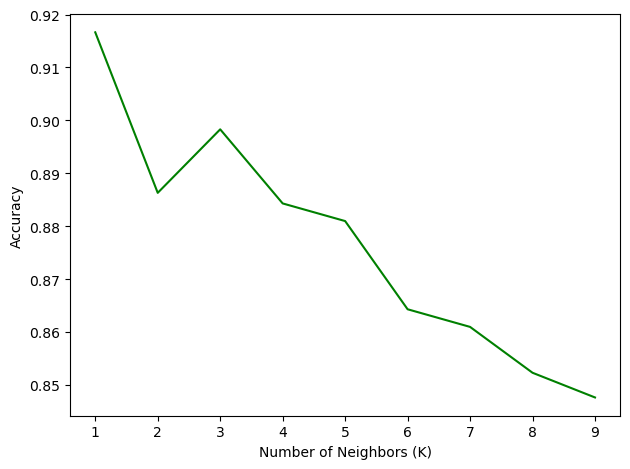

In [35]:
# KNN visualization
# 가장 정확도가 높은 k값 도촐, k=1
plt.plot(range(1, Ks), mean_acc, 'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [36]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9166388796265422 with k= 1
